In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

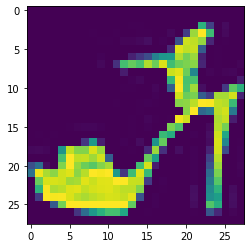

In [4]:
plt.imshow(train_images[9]);

In [5]:
train_labels[9]

5

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

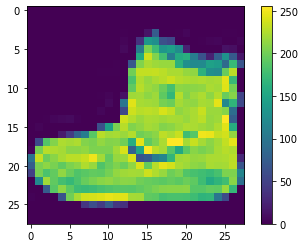

In [7]:
plt.imshow(train_images[0])
plt.colorbar();

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

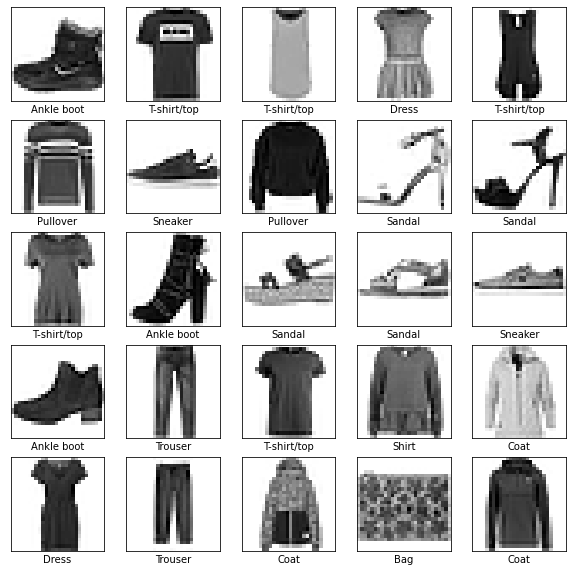

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
model = Sequential()
model.add(Flatten(input_shape = [28,28]))
model.add(Dense(128,activation= "relu"))
model.add(Dense(10,activation = "softmax"))

In [14]:
model.compile(optimizer='adam',
              loss="SparseCategoricalCrossentropy",
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
es = EarlyStopping(monitor= "loss",patience= 5)

In [17]:
model.fit(train_images, train_labels, epochs=10,callbacks= es)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5040 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3743 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3368 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2951 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2802 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2590 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2470 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [18]:
gr = pd.DataFrame(model.history.history)

,loss,accuracy
0,0.503975,0.824683
1,0.374285,0.866250
2,0.336753,0.876000
3,0.313395,0.884083
4,0.295124,0.890533
5,0.280204,0.895917
6,0.268509,0.900150
7,0.258994,0.903417
8,0.247007,0.908167
9,0.238868,0.910667


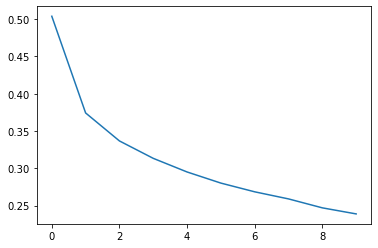

In [37]:
gr["loss"].plot();

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3341 - accuracy: 0.8813 - 809ms/epoch - 3ms/step

Test accuracy: 0.8812999725341797


In [20]:
predictions = model.predict(test_images)

In [21]:
predictions

array([[1.5931158e-09, 3.7216342e-08, 4.9250021e-10, ..., 7.2440840e-02,
        4.5941811e-06, 9.2725974e-01],
       [4.9296746e-06, 2.8264388e-10, 9.9288827e-01, ..., 1.2590826e-18,
        1.1469905e-09, 1.0042937e-14],
       [1.1354857e-06, 9.9999881e-01, 5.6758764e-13, ..., 7.8517817e-22,
        5.7742694e-10, 3.9003489e-18],
       ...,
       [3.8705490e-05, 2.1339451e-11, 2.0147165e-05, ..., 1.8538509e-08,
        9.9966967e-01, 1.9521804e-11],
       [1.1230641e-06, 9.9998915e-01, 1.6945666e-10, ..., 1.6949243e-15,
        7.0792066e-07, 1.1341862e-09],
       [1.7409517e-06, 2.2322040e-09, 2.3041155e-06, ..., 7.4882340e-04,
        1.7517038e-04, 4.4450252e-07]], dtype=float32)

In [22]:
predictions[7]

array([4.8370848e-06, 1.1061595e-08, 3.8420575e-04, 3.6836204e-06,
       9.9293198e-03, 5.3728362e-11, 9.8967707e-01, 9.0698738e-13,
       7.7082069e-07, 3.1988787e-09], dtype=float32)

In [23]:
np.argmax(predictions[7])

6

In [24]:
test_labels[7]

6

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

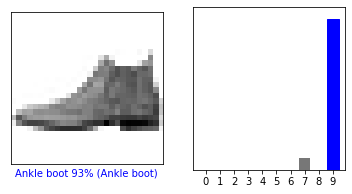

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

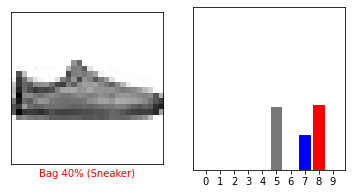

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

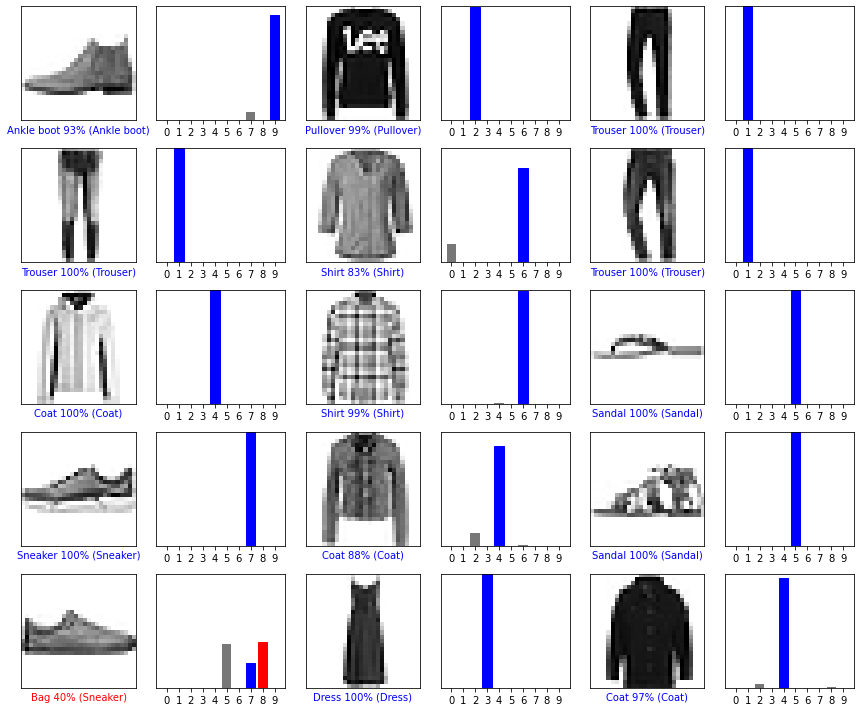

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [29]:
# Grab an image from the test dataset.
img = test_images[30]
img.shape

(28, 28)

In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)
print(predictions_single)

[[8.2408555e-15 5.3165341e-16 6.0652400e-15 8.5365029e-16 2.1509289e-11
  1.9539115e-13 4.3795598e-14 5.7257732e-12 1.0000000e+00 6.1297133e-16]]


In [32]:
np.argmax(predictions_single)

8

In [33]:
test_labels[30]

8